In [1]:
# Import the libraries we need
import pandas as pd  # For working with data tables
import numpy as np   # For math operations
import matplotlib.pyplot as plt  # For creating charts
#import seaborn as sns  # For prettier charts
print(f"NumPy version: {np.__version__}")
# Load your data
# Replace 'your_file.csv' with your actual file name
df = pd.read_csv('ai_job_dataset.csv')



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "C:\Users\admin\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\admin\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\admin\anaconda3\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\admin\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\admin\anaconda3\lib\site-pack

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "C:\Users\admin\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\admin\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\admin\anaconda3\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\admin\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\admin\anaconda3\lib\site-pack

AttributeError: _ARRAY_API not found

NumPy version: 2.0.2


In [2]:

# STEP 1: Look at your data first
print("Dataset shape (rows, columns):", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nColumn names:")
print(df.columns.tolist())
print("\nData types:")
print(df.dtypes)


Dataset shape (rows, columns): (15000, 19)

First 5 rows:
    job_id              job_title  salary_usd salary_currency  \
0  AI00001  AI Research Scientist       90376             USD   
1  AI00002   AI Software Engineer       61895             USD   
2  AI00003          AI Specialist      152626             USD   
3  AI00004           NLP Engineer       80215             USD   
4  AI00005          AI Consultant       54624             EUR   

  experience_level employment_type company_location company_size  \
0               SE              CT            China            M   
1               EN              CT           Canada            M   
2               MI              FL      Switzerland            L   
3               SE              FL            India            M   
4               EN              PT           France            S   

  employee_residence  remote_ratio  \
0              China            50   
1            Ireland           100   
2        South Korea        

In [3]:

# STEP 2: Check for problems
print("\n=== DATA QUALITY CHECK ===")
print("Missing values per column:")
print(df.isnull().sum())
print("\nDuplicate rows:", df.duplicated().sum())



=== DATA QUALITY CHECK ===
Missing values per column:
job_id                    0
job_title                 0
salary_usd                0
salary_currency           0
experience_level          0
employment_type           0
company_location          0
company_size              0
employee_residence        0
remote_ratio              0
required_skills           0
education_required        0
years_experience          0
industry                  0
posting_date              0
application_deadline      0
job_description_length    0
benefits_score            0
company_name              0
dtype: int64

Duplicate rows: 0


In [4]:
# STEP 3: Fix missing values
# Why: Missing data can break our analysis
print("\n=== FIXING MISSING VALUES ===")

# For numeric columns, fill with median (middle value)
if 'years_experience' in df.columns:
    median_exp = df['years_experience'].median()
    df['years_experience'].fillna(median_exp, inplace=True)
    print(f"Filled missing years_experience with median: {median_exp}")

# For text columns, fill with 'Unknown'
text_columns = ['required_skills', 'education_required', 'company_name']                                                   
for col in text_columns:
    if col in df.columns:
        df[col].fillna('Unknown', inplace=True)
        print(f"Filled missing {col} with 'Unknown'")



=== FIXING MISSING VALUES ===
Filled missing years_experience with median: 5.0
Filled missing required_skills with 'Unknown'
Filled missing education_required with 'Unknown'
Filled missing company_name with 'Unknown'


C:\Users\admin\AppData\Local\Temp\ipykernel_16008\3205109197.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['years_experience'].fillna(median_exp, inplace=True)
C:\Users\admin\AppData\Local\Temp\ipykernel_16008\3205109197.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


In [5]:

# STEP 4: Remove duplicates
# Why: Duplicate rows can skew our analysis
before_count = len(df)
df = df.drop_duplicates()
after_count = len(df)
print(f"\nRemoved {before_count - after_count} duplicate rows")



Removed 0 duplicate rows


In [6]:
# STEP 5: Fix data types
# Why: Dates should be date format, numbers should be numeric
print("\n=== FIXING DATA TYPES ===")

# Convert date columns
if 'posting_date' in df.columns:
    df['posting_date'] = pd.to_datetime(df['posting_date'], errors='coerce')
    print("Converted posting_date to datetime")
    
# Find rows with blank 'posting_date' 

#blank_dates_rows = df[df['posting_date'].isnull()] 
#selects all the rows where the 'posting_date' is blank and puts them into a new table called 'blank_dates_rows'. 
#Then, this line prints that new table so you can see all the rows with the missing date
#print("Rows with blank 'posting_date':") 
#print(blank_dates_rows). 

#This helps you identify the specific rows that have missing date information, 
#so you can decide how to handle them in your analysis.


=== FIXING DATA TYPES ===
Converted posting_date to datetime


In [7]:

# STEP 6: Handle outliers in salary
# Why: Extremely high/low salaries might be data entry errors
if 'salary' in df.columns:
    # Calculate quartiles (25th, 75th percentile)
    Q1 = df['salary'].quantile(0.25)
    Q3 = df['salary'].quantile(0.75)
    IQR = Q3 - Q1  # Interquartile range
    
    # Define outlier boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    print(f"Salary range: ${lower_bound:,.0f} - ${upper_bound:,.0f}")
    
    # Count outliers
    outliers = df[(df['salary'] < lower_bound) | (df['salary'] > upper_bound)]
    print(f"Found {len(outliers)} salary outliers")
    
    # Remove extreme outliers (optional)
    df = df[(df['salary'] >= lower_bound) & (df['salary'] <= upper_bound)]
print("done")

done


In [8]:
# STEP 7: Create useful new columns
# Why: New columns can help us analyze data better
print("\n=== CREATING NEW COLUMNS ===")

# Extract year from posting date
if 'posting_date' in df.columns:
    df['posting_year'] = df['posting_date'].dt.year
    df['posting_month'] = df['posting_date'].dt.month
    print("Created posting_year and posting_month columns")

# Categorize remote work
if 'remote_ratio' in df.columns:
    def categorize_remote(ratio):
        if ratio == 0:
            return 'On-site'
        elif ratio == 100:
            return 'Fully Remote'
        else:
            return 'Hybrid'
    
    df['remote_category'] = df['remote_ratio'].apply(categorize_remote)
    print("Created remote_category column")


=== CREATING NEW COLUMNS ===
Created posting_year and posting_month columns
Created remote_category column


In [9]:

# STEP 8: Save cleaned data
df.to_csv('ai_jobs_cleaned.csv', index=False)
print(f"\nCleaned data saved! Final dataset has {len(df)} rows")


Cleaned data saved! Final dataset has 15000 rows


In [10]:

# STEP 9: Basic statistics
print("\n=== BASIC STATISTICS ===")
if 'salary' in df.columns:
    print(f"Average salary: ${df['salary'].mean():,.0f}")
    print(f"Median salary: ${df['salary'].median():,.0f}")
    print(f"Salary range: ${df['salary'].min():,.0f} - ${df['salary'].max():,.0f}")

if 'experience_level' in df.columns:
    print("\nJobs by experience level:")
    print(df['experience_level'].value_counts())


=== BASIC STATISTICS ===

Jobs by experience level:
experience_level
MI    3781
EX    3760
SE    3741
EN    3718
Name: count, dtype: int64


In [11]:
"""The reason you see `<Figure size 1000x600 with 0 Axes>` in Jupyter output is 
because the code is trying to display a plot, but the environment might not be configured correctly
to show the plot directly in the output cell. 
To fix this, you can try adding `%matplotlib inline` at the beginning of your Jupyter Notebook cell."""

'The reason you see `<Figure size 1000x600 with 0 Axes>` in Jupyter output is \nbecause the code is trying to display a plot, but the environment might not be configured correctly\nto show the plot directly in the output cell. \nTo fix this, you can try adding `%matplotlib inline` at the beginning of your Jupyter Notebook cell.'

In [12]:
%matplotlib inline

In [13]:
%matplotlib notebook


In [14]:
#import seaborn as sns  # For prettier charts

<IPython.core.display.Javascript object>


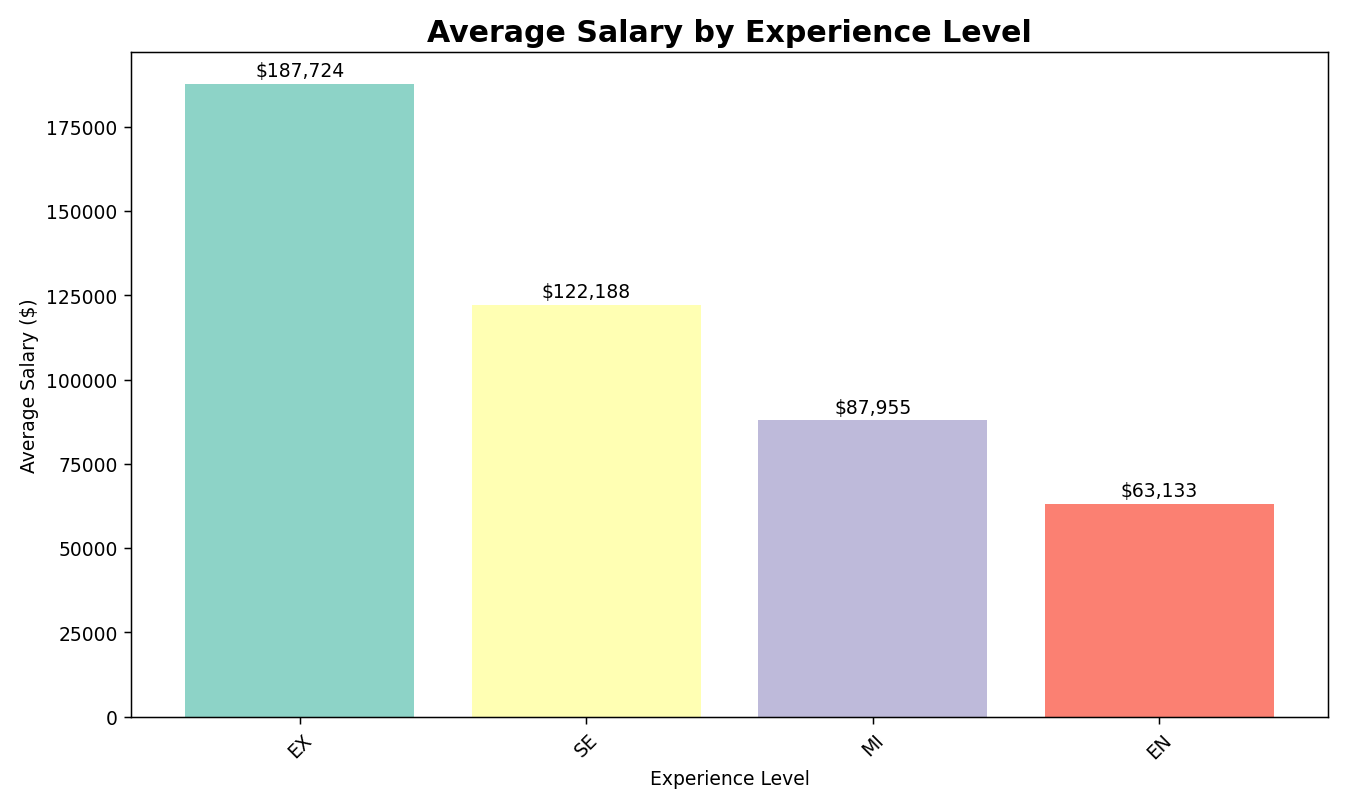

experience_level
EX    187723.647340
SE    122187.657845
MI     87955.471833
EN     63133.377084
Name: salary_usd, dtype: float64
Key Insight: Senior and Executive roles pay significantly more


In [24]:
# Set up for nice-looking charts
plt.style.use('default')

# CHART 1: Salary by Experience Level
# Purpose: See how salary changes with experience
plt.figure(figsize=(10, 6))

if 'experience_level' in df.columns and 'salary_usd' in df.columns:
    # Group by experience level and calculate average salary
    salary_by_exp = df.groupby('experience_level')['salary_usd'].mean().sort_values(ascending=False)
    print(salary_by_exp)
    
    # Create bar chart with a nice color palette
    colors = plt.cm.Set3(range(len(salary_by_exp)))  # Using matplotlib's colormap
    plt.bar(salary_by_exp.index, salary_by_exp.values, color=colors)
    
    plt.title('Average Salary by Experience Level', fontsize=16, fontweight='bold')
    plt.xlabel('Experience Level')
    plt.ylabel('Average Salary ($)')
    plt.xticks(rotation=45)
    
    # Add value labels on bars
    for i, v in enumerate(salary_by_exp.values):
        plt.text(i, v + 1000, f'${v:,.0f}', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()
    
    print("Key Insight: Senior and Executive roles pay significantly more")
else:
    print("Required columns 'experience_level' and/or 'salary' not found in dataframe")

<IPython.core.display.Javascript object>


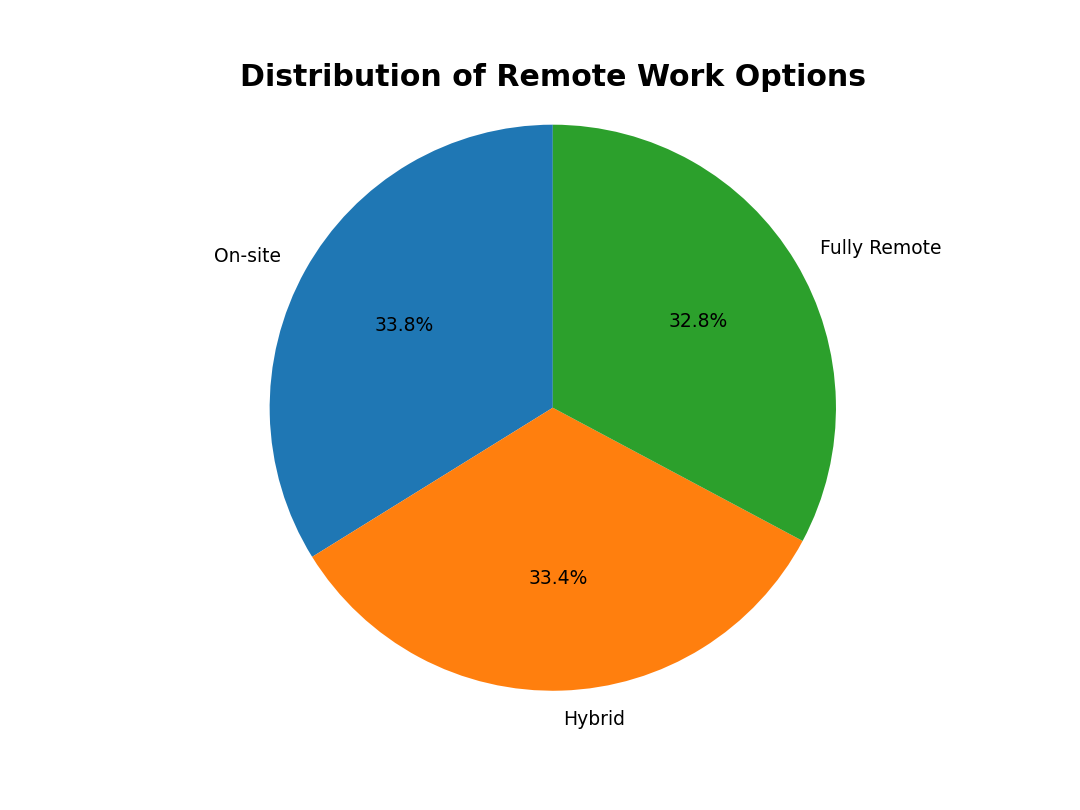

Key Insight: Remote work is becoming more common in AI jobs


In [23]:

# CHART 2: Remote Work Distribution
# Purpose: See how common remote work is
plt.figure(figsize=(8, 6))

if 'remote_category' in df.columns:
    remote_counts = df['remote_category'].value_counts()
    
    # Create pie chart
    plt.pie(remote_counts.values, labels=remote_counts.index, autopct='%1.1f%%', startangle=90)
    plt.title('Distribution of Remote Work Options', fontsize=16, fontweight='bold')
    plt.axis('equal')
    plt.show()
    
    print("Key Insight: Remote work is becoming more common in AI jobs")


In [19]:
print(remote_counts)

remote_category
On-site         5075
Hybrid          5005
Fully Remote    4920
Name: count, dtype: int64


Counter({'python': 4450, 'sql': 3407, 'tensorflow': 3022, 'kubernetes': 3009, 'scala': 2794, 'pytorch': 2777, 'linux': 2705, 'git': 2631, 'java': 2578, 'gcp': 2442, 'hadoop': 2419, 'tableau': 2341, 'r': 2311, 'computer vision': 2284, 'data visualization': 2270, 'deep learning': 2189, 'mlops': 2164, 'spark': 2155, 'nlp': 2145, 'azure': 2144, 'aws': 2018, 'mathematics': 1943, 'docker': 1862, 'statistics': 1833})
{'python': 4450, 'sql': 3407, 'tensorflow': 3022, 'kubernetes': 3009, 'scala': 2794, 'pytorch': 2777, 'linux': 2705, 'git': 2631, 'java': 2578, 'gcp': 2442}


<IPython.core.display.Javascript object>


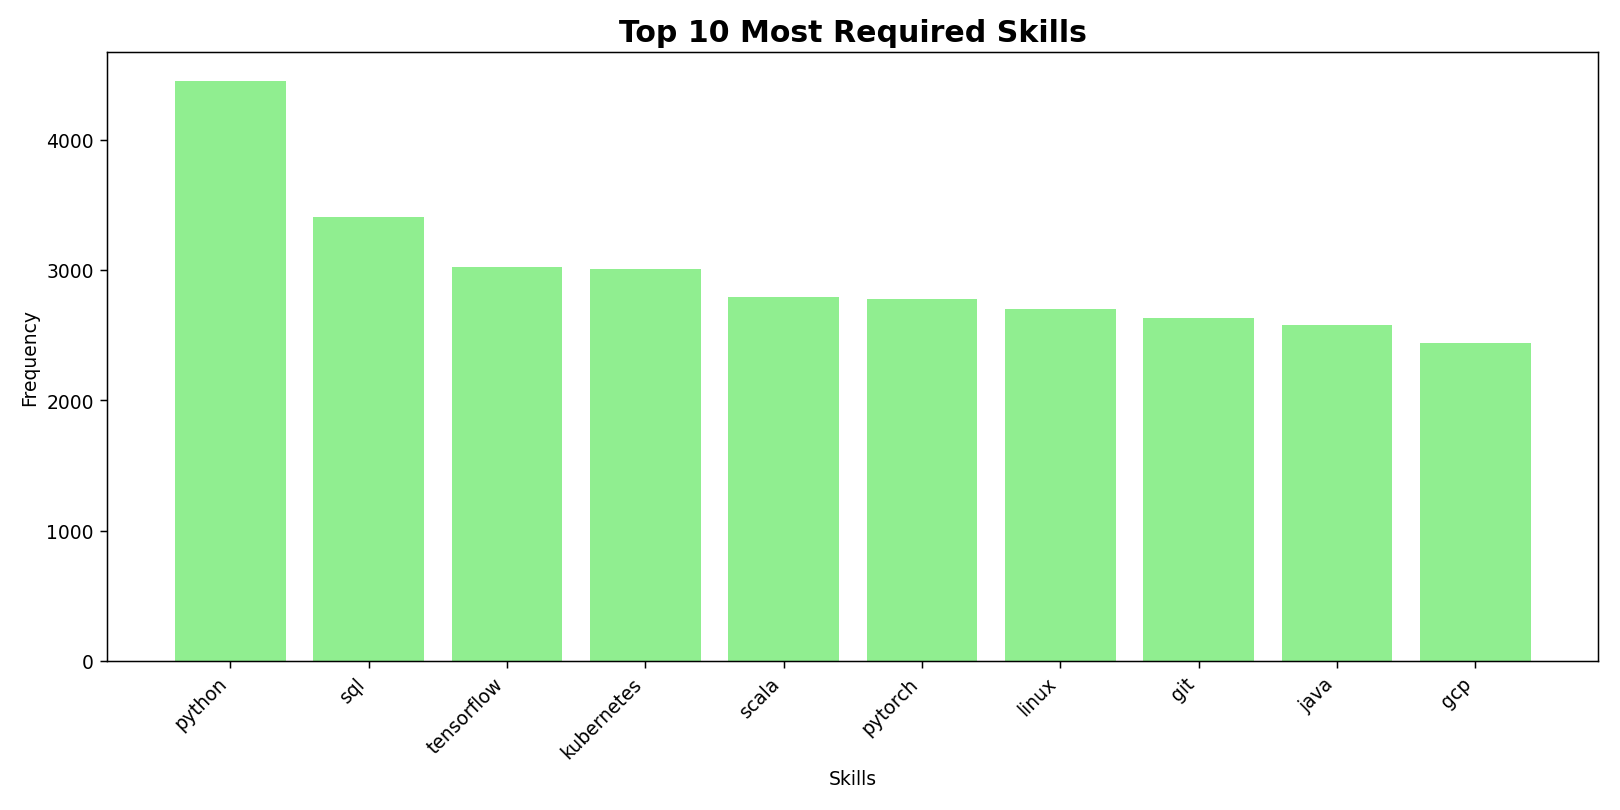

Key Insight: Python and Machine Learning are top skills


In [27]:

# CHART 3: Top Skills Analysis
# Purpose: Find which skills are most in demand
if 'required_skills' in df.columns:
    # Split skills and count frequency
    all_skills = []
    for skills_str in df['required_skills'].dropna():
        if skills_str != 'Unknown':
            # Split by comma and clean up
            skills = [skill.strip().lower() for skill in str(skills_str).split(',')]
            all_skills.extend(skills)
    #print(all_skills)
    # Count skills
    from collections import Counter
    skill_counts = Counter(all_skills)
    top_skills = dict(skill_counts.most_common(10))
    print(skill_counts)
    print(top_skills)
    
    # Create bar chart
    plt.figure(figsize=(12, 6))
    plt.bar(top_skills.keys(), top_skills.values(), color='lightgreen')
    plt.title('Top 10 Most Required Skills', fontsize=16, fontweight='bold')
    plt.xlabel('Skills')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
    print("Key Insight: Python and Machine Learning are top skills")

NameError: name 'required_skills' is not defined

<IPython.core.display.Javascript object>


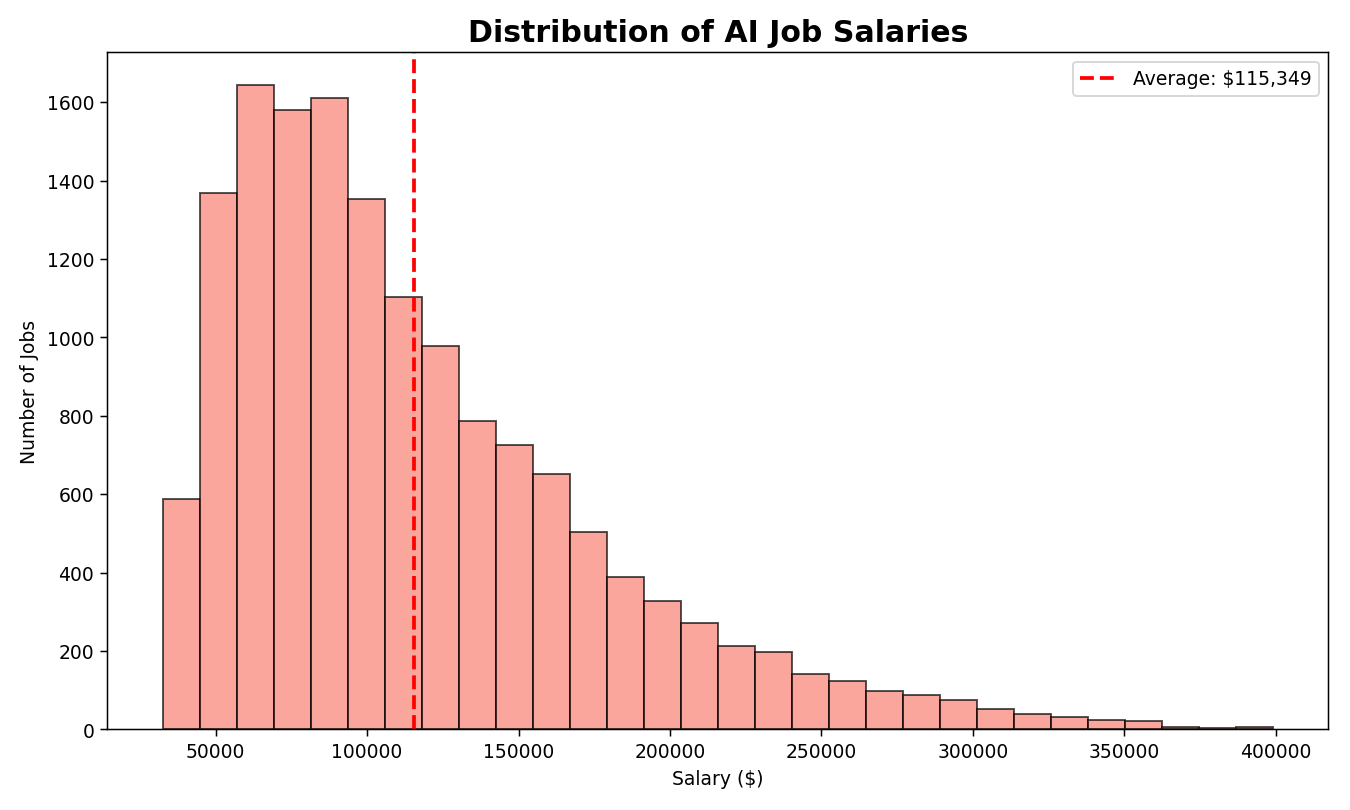

Key Insight: Most AI jobs pay between $70,180 and $146,408


In [21]:

# CHART 4: Salary Distribution
# Purpose: See the spread of salaries
plt.figure(figsize=(10, 6))
if 'salary_usd' in df.columns:
    plt.hist(df['salary_usd'], bins=30, color='salmon', alpha=0.7, edgecolor='black')
    plt.title('Distribution of AI Job Salaries', fontsize=16, fontweight='bold')
    plt.xlabel('Salary ($)')
    plt.ylabel('Number of Jobs')
    
    # Add average line
    avg_salary = df['salary_usd'].mean()
    plt.axvline(avg_salary, color='red', linestyle='--', linewidth=2, 
                label=f'Average: ${avg_salary:,.0f}')
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    print(f"Key Insight: Most AI jobs pay between ${df['salary_usd'].quantile(0.25):,.0f} and ${df['salary_usd'].quantile(0.75):,.0f}")


<IPython.core.display.Javascript object>


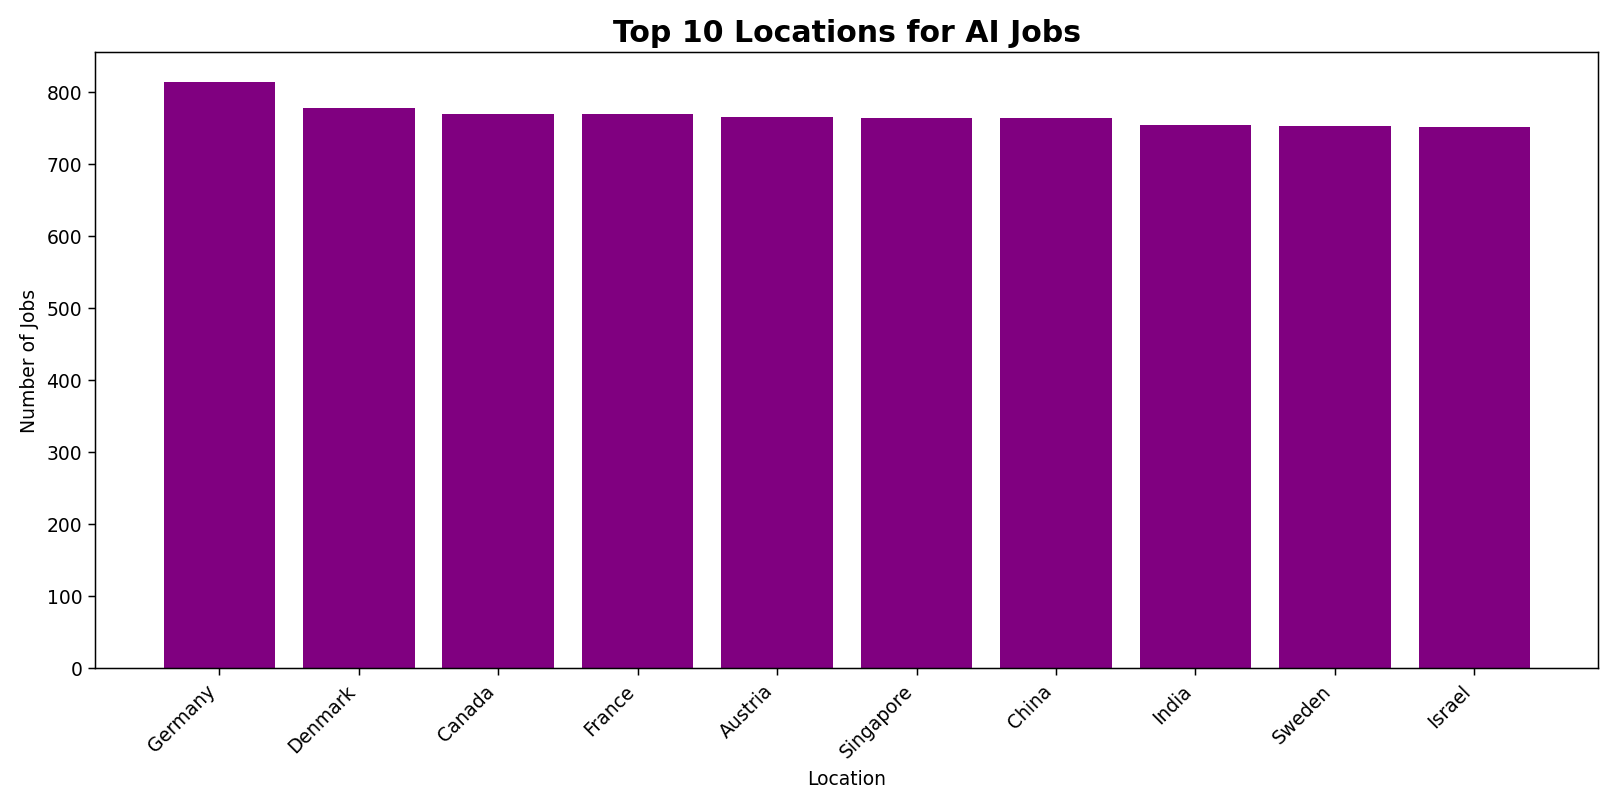

company_location
Germany      814
Denmark      778
Canada       769
France       769
Austria      765
Singapore    764
China        763
India        754
Sweden       752
Israel       751
Name: count, dtype: int64
Key Insight: Certain locations dominate the AI job market


In [29]:


# CHART 5: Jobs by Location
# Purpose: See where most AI jobs are located
plt.figure(figsize=(12, 6))
if 'company_location' in df.columns:
    location_counts = df['company_location'].value_counts().head(10)
    print(location_counts)
    plt.bar(range(len(location_counts)), location_counts.values, color='purple')
    plt.title('Top 10 Locations for AI Jobs', fontsize=16, fontweight='bold')
    plt.xlabel('Location')
    plt.ylabel('Number of Jobs')
    plt.xticks(range(len(location_counts)), location_counts.index, rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
    print("Key Insight: Certain locations dominate the AI job market")